In [8]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


# Stats

In [9]:
stats = get_all_stats()

  0%|          | 0/26 [00:00<?, ?it/s]

# Static features

In [10]:
def logistic_regression_I(network_index: int):
  X = dict()
  for heuristic in ['aa', 'cn', 'jc', 'pa']:
    X[heuristic] = np.load(
      f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy')
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000)) # type: ignore
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1]) # type: ignore
  
  return auc

auc_I = {
  network_index: logistic_regression_I(network_index) 
  for network_index in network_indices}
auc_I

{1: 0.6943492383512545,
 2: 0.8165509136892234,
 3: 0.8512239051815375,
 4: 0.7535110620134547,
 5: 0.6883333599999999,
 6: 0.7466445844584457,
 7: 0.7213059313340282,
 8: 0.7600636718669997,
 9: 0.8381606811170779,
 10: 0.9030793212769094,
 11: 0.9331958581396838,
 12: 0.8566849482783669,
 13: 0.7402823858196437,
 14: 0.8681486462853869,
 16: 0.8847783831169288,
 18: 0.8652964122697375,
 19: 0.9187191180235534,
 20: 0.8231780937955141,
 21: 0.6671958009744583,
 22: 0.9431028862468996,
 23: 0.919419610850506,
 24: 0.7726754844127647,
 25: 0.8647308432742988,
 28: 0.8767453035722086,
 29: 0.8983539685313229,
 30: 0.8324922823652605}

# Node temporal and static features

In [11]:
def logistic_regression_I_II(network_index: int, hypergraph: bool):
  X = dict()
  for heuristic in ['aa', 'cn', 'jc', 'pa']:
    X[heuristic] = (
      np.load(
        f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy'))
    
  if hypergraph:
    for time_strategy in time_strategies:
      for nodepair_strategy in nodepair_strategies:
        for aggregation_strategy in ['m0', 'm1', 'm2', 'm3', 'q0', 'q25', 'q50', 'q75', 'q100']:
          X[(time_strategy, nodepair_strategy, aggregation_strategy)] = (
            np.load(
              f'data/{network_index:02}/features/time_node/'
              f'{time_strategy}_{nodepair_strategy}_{aggregation_strategy}.npy'
            ))
  else:
    for time_strategy in time_strategies:
      for nodepair_strategy in nodepair_strategies:
          X[(time_strategy, nodepair_strategy)] = (
            np.load(
              f'data/{network_index:02}/features/time_node/'
              f'{time_strategy}_{nodepair_strategy}.npy'))
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_I_II = {
  network_index: (
    logistic_regression_I_II(
      network_index, hypergraph=network_index in hypergraph_indices
    )
  )
  for network_index in network_indices
}
auc_I_II

{1: 0.7963340570273441,
 2: 0.8565287605376849,
 3: 0.9111151683739173,
 4: 0.7794236467762142,
 5: 0.728363189673454,
 6: 0.8218795044151269,
 7: 0.8203664719494765,
 8: 0.7935969151881648,
 9: 0.8583552842844843,
 10: 0.9277262807807959,
 11: 0.9348545140234069,
 12: 0.9022579728588637,
 13: 0.8756947360067177,
 14: 0.9425743302973213,
 16: 0.9417403819393487,
 18: 0.9422164096792923,
 19: 0.9361564525876255,
 20: 0.9422870426771462,
 21: 0.7250193240418933,
 22: 0.9721292173663384,
 23: 0.9647461510287402,
 24: 0.9487486966590306,
 25: 0.9398508796172647,
 28: 0.8997074494518459,
 29: 0.9221662984211623,
 30: 0.8519174026191014}

# Edge temporal features

In [14]:
def logistic_regression_III(
    network_index: int, hypergraph: bool):
  aggregation_strategies = ['m0', 'm1', 'q0', 'q25', 'q50', 'q75', 'q100']
  X = dict()
  
  for heuristic in ['aa', 'cn', 'jc', 'pa']:  
    for time_strategy in time_strategies:
      if hypergraph:
        for aggregation_strategy in aggregation_strategies:
            X[(heuristic, time_strategy, aggregation_strategy)] = np.load(
                f'data/{network_index:02}/features/time_edge/'
                f'{heuristic}_{time_strategy}_{aggregation_strategy}.npy')
      else:
        X[(heuristic, time_strategy)] = np.load(
          f'data/{network_index:02}/features/time_edge/'
          f'{heuristic}_{time_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_III = {
  network_index: logistic_regression_III(
    network_index, hypergraph=network_index in hypergraph_indices)
  for network_index in network_indices}
auc_III

{1: 0.8050069800279201,
 2: 0.846229501586881,
 3: 0.8779388604702176,
 4: 0.794992991064307,
 5: 0.7449200118282902,
 6: 0.7953144079829708,
 7: 0.8397112217201665,
 8: 0.8030179840176557,
 9: 0.8463135574572617,
 10: 0.922632033800653,
 11: 0.9398823401594089,
 12: 0.8920569600000001,
 13: 0.7879446514760732,
 14: 0.9188717155882519,
 16: 0.9258814869341185,
 18: 0.9290060163850486,
 19: 0.925427448179214,
 20: 0.9353434874727797,
 21: 0.722343194000739,
 22: 0.9615011909298246,
 23: 0.9540436701491283,
 24: 0.8774147389077056,
 25: 0.903649733972414,
 28: 0.8921500846961219,
 29: 0.9208580695866326,
 30: 0.8478185624657653}

# Figure

In [15]:
stats.columns

Index(['edges', 'density (nx.MultiGraph)', 'fraction edges in GC', 'nodes',
       'avg events per pair', 'density', 'degree assortativity',
       'average clustering coefficient', 'fraction nodes in GC',
       'avg events per pair in GC'],
      dtype='object')

In [16]:
df = pd.DataFrame({
  'degree assortativity': stats['degree assortativity'],
  'I': pd.Series(auc_I),
  'I+II': pd.Series(auc_I_II),
  'III': pd.Series(auc_III)
})
df.reset_index(inplace=True)
df = df.melt(
  id_vars=['index', 'degree assortativity'], 
  var_name='experiment', 
  value_name='auc')
df

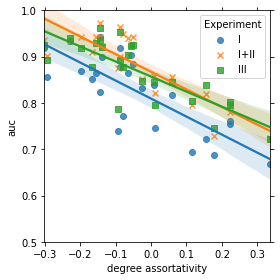

In [19]:
markers = ['o', 'x', 's']
with plt.rc_context(rc):
  for (experiment, df_experiment), marker in zip(df.groupby('experiment'), markers):
    sns.regplot(
      data=df_experiment, x='degree assortativity', y='auc', label=experiment,
      marker=marker)
  plt.legend(title='Experiment')
  plt.ylim(.5, 1)
  plt.tight_layout()
  plt.savefig('figures/degree-assortativity.pdf')

# Figure

In [23]:
df = pd.DataFrame({
  'degree assortativity': stats['degree assortativity'],
  'time agnostic': pd.Series(auc_I),
#   'I+II': pd.Series(auc_I_II),
  'time aware': pd.Series(auc_III)
})
df.reset_index(inplace=True)
df

In [27]:
df = df.melt(
  id_vars=['index', 'degree assortativity'], 
  var_name='experiment', 
  value_name='auc')
df

,index,degree assortativity,experiment,auc
0,1,0.114186,time agnostic,0.694349
1,2,0.059906,time agnostic,0.816551
2,3,-0.166689,time agnostic,0.851224
3,4,0.221522,time agnostic,0.753511
4,5,0.177355,time agnostic,0.688333
5,6,0.010808,time agnostic,0.746645
6,7,0.155727,time agnostic,0.721306
7,8,0.221522,time agnostic,0.760064
8,9,0.008341,time agnostic,0.838161
9,10,-0.055707,time agnostic,0.903079


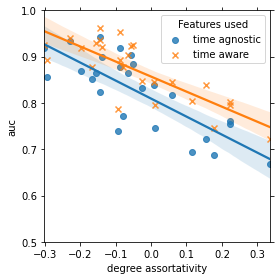

In [28]:
markers = ['o', 'x', 's']
with plt.rc_context(rc):
  for (experiment, df_experiment), marker in zip(df.groupby('experiment'), markers):
    sns.regplot(
      data=df_experiment, x='degree assortativity', y='auc', label=experiment,
      marker=marker)
  plt.legend(title='Features used')
  plt.ylim(.5, 1)
  plt.tight_layout()
  plt.savefig('figures/degree-assortativity.pdf')